<h1 style="margin-bottom:0"><center>DI 501 - Introduction to Data Informatics</center></h1>
<h2 style="margin-top:0"><center>Classification Tutorial</center></h2>
<br>
<p style="margin-top:0"><center><b>This tutorial is prepared for Middle East Technical University's DI 501 - Introduction to Data Informatics course.</b></center></p>
<hr style="height:2px;color:navy;margin-top:0">
<p style="margin-top:0; text-align: justify; font-size:15px">Classification is when the feature to be predicted contains categories of values. Each of these categories is considered as a class into which the predicted value falls and hence has its name, classification. In this tutorial, we will talk about how to implement different kinds of classification algortihms. We will also talk about how to calculate their performances as well. </p>
<p style="margin-top:1; text-align: justify; font-size:15px"> </p>

<h3 style="margin-bottom:0">1) Installation</h3>
<br>
<p style="margin-top:0; text-align: justify">Here, we will be mostly utilizing scikit-learn functions. So, you should install it.</p>
<p style="margin-top:1; text-align: justify">If you have Python, you can proceed to install them the following codes: </p>

In [1]:
#conda install scikit-learn

or

In [2]:
#pip install scikit-learn

<h3 style="margin-bottom:0">2) Importing</h3>
<br>
<p style="margin-top:0; text-align: justify">We import our libraries here. </p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

<h3 style="margin-bottom:0">3) Data</h3>
<br>
<p style="margin-top:0; text-align: justify"> In this tutorial, we use our famous iris dataset.
<br>

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'])
df.head(5)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h3 style="margin-bottom:0">4) K-Nearest Neighbors</h3>

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks.
<ul><li>It is a lazy learning algorithm since it doesn't have a specialized training phase.</li>
<li>It uses all of the data for training while classifying a new data point or instance.</li>
<li>KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data.</li>

First, we split our dataset into X and Y variables.

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

Then, we create test and traing splits. We want to use 40% as our test data. Using the same random state here is important to get the same result everytime you run all the cells.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=123)

Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. We use fit_transform() on the train data so that we learn the parameters of scaling on the train data and in the same time we scale the train data. We only use transform() on the test data because we use the scaling paramaters learned on the train data to scale the test data.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now, we create our model. We chose k as 5 for now, but later we will show how to choose number of nearest neightbours.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

We have our model, now we create predictions.

In [8]:
y_pred = classifier.predict(X_test)

Now, we need to evaluate performance. We can use confusion matrix or classification report for this purpose. They are both included in scikit learn.

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22  0  0]
 [ 0 15  1]
 [ 0  2 20]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.88      0.94      0.91        16
 Iris-virginica       0.95      0.91      0.93        22

       accuracy                           0.95        60
      macro avg       0.94      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60



Please remember that p𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=𝑇𝑃/(𝑇𝑃+𝐹𝑃) and r𝑒𝑐𝑎𝑙𝑙=𝑇𝑃/(𝑇𝑃+𝐹𝑁). Also, we can see from confusion matrix, we labeled 95% of the data correctly.

Finally, we can investigate the optimum "k" for our knn algorithm based on the performances for different k options (we will look between 3 and 21 with a step size 2). Don't forget that we can choose the step size larger at the beginning (for instance 1,5,9,13...) and then you can try smaller step size  on the optimum k you obtained earlier. Select k from odd numbers.

In [10]:
error = []

for i in range(3, 21,2):
    knn = KNeighborsClassifier(n_neighbors=i, p=2)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

When we plot:

Text(0, 0.5, 'Mean Error')

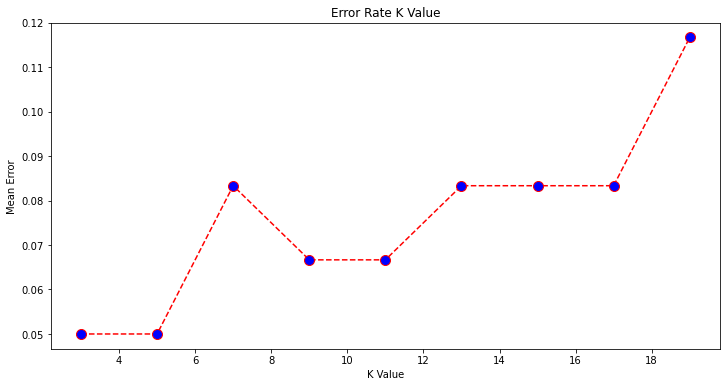

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(3, 21,2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Here, you can see that the best performance was obtained when k=3 and k=5.

<h3 style="margin-bottom:0">5) Naive Bayes</h3>

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

First, we split our dataset into X and Y variables.

In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

Then, we create test and traing splits. We want to use 40% as our test data.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=123)

Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Now, we create our model. Here, we have used a Gaussian model, there are several other models such as Bernoulli, Categorical and Multinomial.

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

We have our model, now we can obtain predictions.

In [17]:
y_pred = classifier.predict(X_test)

Now, we need to evaluate performance. We can use confusion matrix or classification report for this purpose.

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22  0  0]
 [ 0 16  0]
 [ 0  2 20]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.89      1.00      0.94        16
 Iris-virginica       1.00      0.91      0.95        22

       accuracy                           0.97        60
      macro avg       0.96      0.97      0.96        60
   weighted avg       0.97      0.97      0.97        60



Please remember that p𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=𝑇𝑃/(𝑇𝑃+𝐹𝑃) and r𝑒𝑐𝑎𝑙𝑙=𝑇𝑃/(𝑇𝑃+𝐹𝑁). Also, we can see from confusion matrix, we labeled 97% of the data correctly.

<h3 style="margin-bottom:0">6) Decision Trees</h3>

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

First, we split our dataset into X and Y variables.

In [19]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

Then, we create test and traing splits. We want to use 40% as our test data. Using random state here is important to get the same result everytime you run all the cells.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=123)

Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now, we create our model. There are many splitting criteria used in decision trees. The 3 main splitting criteria used in decision trees are gini, entropy and variance. For classification, generally either gini or entropy is used. For regression, the most common one is variance. Default criterion in decision trees in scikit learn is gini, we will use entropy here.

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

We have our model, now we create predictions.

In [15]:
y_pred = classifier.predict(X_test)

Now, we need to evaluate performance. We can use confusion matrix or classification report for this purpose.

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22  0  0]
 [ 0 16  0]
 [ 0  3 19]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.84      1.00      0.91        16
 Iris-virginica       1.00      0.86      0.93        22

       accuracy                           0.95        60
      macro avg       0.95      0.95      0.95        60
   weighted avg       0.96      0.95      0.95        60



Please remember that p𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=𝑇𝑃/(𝑇𝑃+𝐹𝑃) and r𝑒𝑐𝑎𝑙𝑙=𝑇𝑃/(𝑇𝑃+𝐹𝑁). Also, we can see from confusion matrix, we labeled 96% of the data correctly.

We can also visualize our decision graph with the following code:

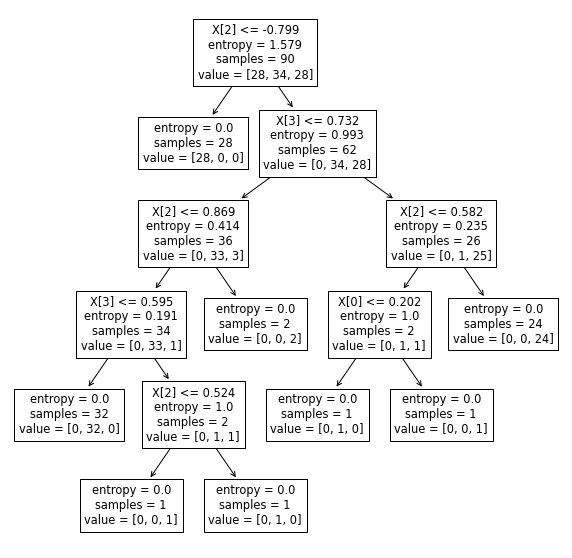

In [25]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(classifier)
plt.show()

<h3 style="margin-bottom:0">7) Support Vector Machines (SVM)</h3>

SVMs choose the discriminant line as the center of the bar maximizes the margin between the classes.

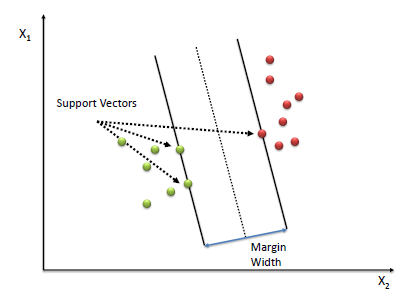

First, we split our dataset into X and Y variables.

In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

Then, we create test and traing splits. We want to use 40% as our test data. Using random state here is important to get the same result everytime you run all the cells.,

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=123)

Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now, we create our model. Kernel parameter specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. It stands for radial basis function.

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

We have our model, now we create predictions.

In [30]:
y_pred = classifier.predict(X_test)

Now, we need to evaluate performance. We can use confusion matrix or classification report for this purpose.

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22  0  0]
 [ 0 16  0]
 [ 0  1 21]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.95      0.98        22

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



Please remember that p𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=𝑇𝑃/(𝑇𝑃+𝐹𝑃) and r𝑒𝑐𝑎𝑙𝑙=𝑇𝑃/(𝑇𝑃+𝐹𝑁). Also, we can see from confusion matrix, we labeled 98% of the data correctly.

<h3 style="margin-bottom:0">8) Logistic Regression</h3>

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist.

First, we split our dataset into X and Y variables.

In [32]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

Then, we create test and traing splits. We want to use 40% as our test data. Using random state here is important to get the same result everytime you run all the cells.,

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=123)

Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated.

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now, we create our model. 

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=1.5)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.5)

We have our model, now we create predictions.

In [36]:
y_pred = classifier.predict(X_test)

Now, we need to evaluate performance. We can use confusion matrix or classification report for this purpose.

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22  0  0]
 [ 0 16  0]
 [ 0  1 21]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.95      0.98        22

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



Please remember that p𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=𝑇𝑃/(𝑇𝑃+𝐹𝑃) and r𝑒𝑐𝑎𝑙𝑙=𝑇𝑃/(𝑇𝑃+𝐹𝑁). Also, we can see from confusion matrix, we labeled 98% of the data correctly.

<h3 style="margin-bottom:0">9) Conclusion</h3>

It is impossible to say that one is always better than another. For example, if you split training and test with another random state, you will get different results. This is mainly because we have very low amount of data here. In your projects or thesis, you should always look at different types of classification algortihms with different parameters to come up with the best solution for your problem.

<table>
  <tr>
    <th></th>
    <th>KNN</th>
    <th>Naive Bayes</th>
    <th>Decision Trees</th>
    <th>SVM</th>
    <th>Logistic Regression</th>
  </tr>
  <tr>
    <td>Precision</td>
    <td>0.95</td>
    <td>0.97</td>
      <td>0.96</td>
      <td><b>0.98</b></td>
      <td><b>0.98</b></td>
  </tr>
  <tr>
    <td>Recall</td>
    <td>0.95</td>
    <td>0.97</td>
      <td>0.95</td>
      <td><b>0.98</b></td>
      <td><b>0.98</b></td>
  </tr>
    <tr>
    <td>Accuracy</td>
    <td>0.95</td>
    <td>0.97</td>
        <td>0.95</td>
        <td><b>0.98</b></td>
        <td><b>0.98</b></td>
  </tr>
</table>

<h3 style="margin-bottom:0">10) Useful Links</h3>

This tutorial is prepared by official scikit-learn document. I will provide an example which includes many types of classification algorithms and official documentation for 5 algorithms we used above. You can always refer to them for understanding how parameters work.

<a href="https://developer.ibm.com/tutorials/learn-classification-algorithms-using-python-and-scikit-learn/"> An Example:</a> This website provides example of how to implement different kinds of classification algorithms in Python.<br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html"> KNN:</a> Official documentation for KNN.<br>
<a href="https://scikit-learn.org/stable/modules/classes.html?highlight=naive%20bayes#module-sklearn.naive_bayes"> Naive Bayes:</a> Official documentation for Naive Bayes. <br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier"> Decision Trees:</a> Official documentation for Decision Trees.<br>
<a href="https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm"> SVM:</a> Official documentation for SVM.<br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression"> Logistic Regression:</a> Official documentation logistic regression.
    